In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploring the factors contributing to extended call durations, such as agent performance, call types, and sentiment.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cleaning Data

### Cleaning calls.csv

In [ ]:
# Reading calls.csv
calls_df=pd.read_csv('/content/drive/MyDrive/SKYHACK_DATA/callsf0d4f5a_updated.csv')

In [ ]:
calls_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,1122072124,8186702651,519057,08-01-2024 00:03,08-01-2024 00:06,08-01-2024 00:18,\n\nAgent: Thank you for calling United Airlin...
1,2266439882,1154544516,488324,08-01-2024 00:05,08-01-2024 00:10,08-01-2024 00:17,\n\nAgent: Thank you for calling United Airlin...
2,1211603231,5214456437,721730,08-01-2024 00:04,08-01-2024 00:14,08-01-2024 00:23,\n\nAgent: Thank you for calling United Airlin...
3,5297766997,5590154991,817160,08-01-2024 00:11,08-01-2024 00:16,08-01-2024 00:40,\n\nAgent: Thank you for calling United Airlin...
4,324593040,6774865122,519057,08-01-2024 00:08,08-01-2024 00:21,08-01-2024 00:34,\n\nAgent: Thank you for calling United Airlin...


In [ ]:
##checking for NULL Values
calls_df.isnull().sum()

,0
call_id,0
customer_id,0
agent_id,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_transcript,0


### Cleaning sentiment.csv

In [ ]:
## Reading sentiment.csv
sentiment_df= pd.read_csv('/content/drive/MyDrive/SKYHACK_DATA/sentiment_statisticscc1e57a (1)_updated.csv')

In [ ]:
sentiment_df.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [ ]:
## Getting Important Description about data
sentiment_df.describe()

,call_id,agent_id,average_sentiment,silence_percent_average
count,7.181000e+04,71810.000000,71701.000000,71810.000000
mean,4.993574e+09,564768.278039,-0.033519,0.285515
std,2.889673e+09,257532.362167,0.143715,0.192031
min,1.316420e+05,102574.000000,-1.380000,0.000000
25%,2.480013e+09,347606.000000,-0.110000,0.130000
50%,4.989448e+09,591778.000000,-0.020000,0.260000
75%,7.493629e+09,786323.000000,0.050000,0.410000
max,9.999806e+09,993862.000000,2.670000,0.980000


In [ ]:
## Checking NULL values in sentiment
sentiment_df.isnull().sum()

,0
call_id,0
agent_id,0
agent_tone,217
customer_tone,0
average_sentiment,109
silence_percent_average,0


In [ ]:
## Checking All unique agent_tone and ensuring no two same agent_tone type have different accidental names
print(sentiment_df['agent_tone'].unique())

## Checking All unique customer_tone and ensuring no two same customer_tone type have different accidental names
print(sentiment_df['customer_tone'].unique())

['neutral' 'calm' 'frustrated' 'angry' nan 'polite']
['angry' 'neutral' 'polite' 'frustrated' 'calm']


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


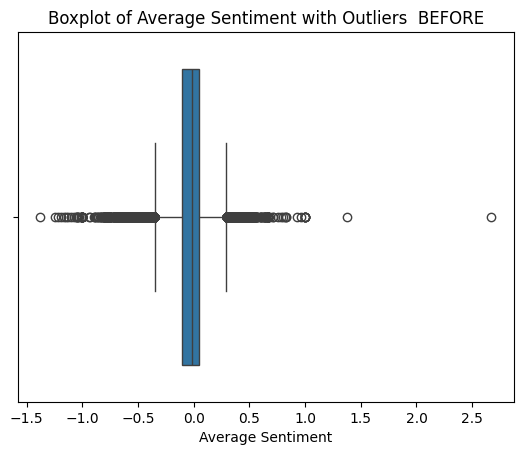

In [ ]:
## Checking For Outliers

# Assuming sentiment_df is your DataFrame containing 'average_sentiment'
sns.boxplot(x=sentiment_df['average_sentiment'])

# Display the plot
plt.title('Boxplot of Average Sentiment with Outliers  BEFORE')
plt.xlabel('Average Sentiment')
plt.show()


As Observed -- Outliers exist in average_sentiment

#### Removing Outliers

In [ ]:
percentiles =
{
    'min': -1.380000,'25%': -0.110000,'50%': -0.020000,'75%': 0.050000,'max': 2.670000
}
#IQR
IQR = percentiles['75%'] - percentiles['25%']

#lower and upper bounds
lower_bound = percentiles['25%'] - 1.5 * IQR
upper_bound = percentiles['75%'] + 1.5 * IQR
data=sentiment_df['average_sentiment']
outliers = [x for x in data  if x < lower_bound or x > upper_bound]

print(outliers)

[0.5, 0.44, -0.38, 0.31, -0.38, 0.35, 0.32, -0.94, -0.42, 0.38, -0.63, 0.33, -0.36, -0.39, 0.39, -0.36, -0.5, -0.37, -0.47, -0.55, 0.35, -0.36, -0.57, -0.46, -0.65, -0.41, -0.36, 0.35, 0.43, -0.38, 0.44, -0.36, 0.3, -0.39, -0.41, -0.53, -0.5, 0.38, -0.42, 0.39, -0.53, 0.3, 0.38, -0.67, -0.38, -0.4, -0.67, 0.31, 0.53, 0.39, -0.4, -0.55, -0.36, 0.33, 0.33, -0.5, -0.36, 0.54, -0.53, 0.36, 0.54, -0.38, 0.31, -0.39, -0.44, 0.4, 0.43, 0.78, -0.46, -0.44, -0.65, -0.51, -0.41, 0.45, -0.67, -0.67, -0.38, -0.38, -0.44, 0.4, -0.44, -1.0, -0.36, -0.73, -0.4, -0.44, 0.3, -0.59, -0.39, 0.47, -0.59, -0.4, 0.43, 0.32, 0.31, 0.3, 0.64, -0.42, -0.37, -0.67, -0.39, -0.45, -0.41, -0.5, 0.33, -0.46, -0.51, -0.4, 0.33, 0.3, -0.4, -0.41, -0.49, -0.55, -0.36, -0.48, -0.44, -0.44, -0.63, 0.67, -0.38, -0.4, -0.41, -0.53, 0.65, -0.36, -0.44, 0.36, 0.42, 0.3, -0.63, -0.63, -0.58, -0.47, -0.62, -0.45, -0.54, -0.44, -0.45, -0.64, 0.41, 0.38, 0.3, -0.8, -0.66, -0.44, -0.4, -0.71, -0.38, -0.38, -0.36, 0.33, -0.42, -0

In [ ]:
len(outliers)

2519

In [ ]:
## Storing Cleaned Data
sentiment_df= sentiment_df[(data >= lower_bound) & (data <= upper_bound)]

### Cleaning reason.csv

In [ ]:
## Loading reason.csv
reason_df = pd.read_csv('/content/drive/MyDrive/SKYHACK_DATA/reason_updated2.csv')

<ipython-input-24-487d5b1ab084>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  reason_df = pd.read_csv('/content/drive/MyDrive/SKYHACK_DATA/reason_updated2.csv')


In [ ]:
reason_df.head()

,call_id,primary_call_reason,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,4667960400,Voluntary_Cancel,NaN,NaN,NaN,NaN,NaN,NaN
1,1122072124,Booking,NaN,NaN,NaN,NaN,NaN,NaN
2,6834291559,IRROPS,NaN,NaN,NaN,NaN,NaN,NaN
3,2266439882,Upgrade,NaN,NaN,NaN,NaN,NaN,NaN
4,1211603231,Seating,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Removing NULL COLUMNS
reason_df= reason_df[['call_id', 'primary_call_reason']]

In [ ]:
reason_df.head()

,call_id,primary_call_reason
0,4667960400,Voluntary_Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [ ]:
## ENSURING NO TWO SAME primary_call_reason HAVE DIFFERENT ACCIDENTAL NAMES

reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.strip()
print(reason_df['primary_call_reason'].unique())

['Voluntary_Cancel' 'Booking' 'IRROPS' 'Upgrade' 'Seating' 'Mileage_Plus'
 'Checkout' 'Voluntary_Change' 'Post_Flight' 'Check_In' 'Other_Topics'
 'Communications' 'Schedule Change' 'Products & Services'
 'Digital_Support' 'Disability' 'Unaccompanied Minor' 'Baggage'
 'Travaler_Updates' 'ETC']


In [ ]:
reason_df.isnull().sum()

,0
call_id,0
primary_call_reason,0


## MERGING DATA AFTER CLEANING

In [ ]:
## Merging call, sentiment and reason Dataframe based on their primary key
df = calls_df.merge(sentiment_df, on=['call_id', 'agent_id'])
df = df.merge(reason_df, on='call_id')

In [ ]:
df.head(5)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason
0,1122072124,8186702651,519057,08-01-2024 00:03,08-01-2024 00:06,08-01-2024 00:18,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Booking
1,2266439882,1154544516,488324,08-01-2024 00:05,08-01-2024 00:10,08-01-2024 00:17,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20,Upgrade
2,1211603231,5214456437,721730,08-01-2024 00:04,08-01-2024 00:14,08-01-2024 00:23,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35,Seating
3,5297766997,5590154991,817160,08-01-2024 00:11,08-01-2024 00:16,08-01-2024 00:40,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.10,0.11,Mileage_Plus
4,324593040,6774865122,519057,08-01-2024 00:08,08-01-2024 00:21,08-01-2024 00:34,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,0.00,0.25,Checkout


In [ ]:
%cd /content/drive/MyDrive/SKYHACK_DATA

/content/drive/MyDrive/SKYHACK_DATA


In [ ]:
## Storing Cleaned_data to my drive
df.to_csv('cleaned_merged_data.csv', index=False)

In [ ]:
## Loading Cleaned Data
df= pd.read_csv('/content/drive/MyDrive/SKYHACK_DATA/cleaned_merged_data.csv')

In [ ]:
## Checking NULL Values
df.isnull().sum()

,0
call_id,0
customer_id,0
agent_id,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_transcript,0
agent_tone,0
customer_tone,0
average_sentiment,0


### Converting All Datetime Columns to standard pandas datetime format

In [ ]:
# ALl datetime columns
datetime_columns = ['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime']

# Looping through each datetime column to convert formats
for col in datetime_columns:
    # Replace '/' with '-'
    df[col] = df[col].astype(str).str.replace('/', '-', regex=False)


    df[col] = pd.to_datetime(df[col], errors='coerce')


print(df[datetime_columns].head())


  call_start_datetime agent_assigned_datetime   call_end_datetime
0 2024-08-01 00:03:00     2024-08-01 00:06:00 2024-08-01 00:18:00
1 2024-08-01 00:05:00     2024-08-01 00:10:00 2024-08-01 00:17:00
2 2024-08-01 00:04:00     2024-08-01 00:14:00 2024-08-01 00:23:00
3 2024-08-01 00:11:00     2024-08-01 00:16:00 2024-08-01 00:40:00
4 2024-08-01 00:08:00     2024-08-01 00:21:00 2024-08-01 00:34:00


In [ ]:
# Verify the conversion
type(df['call_start_datetime'][8000])

pandas._libs.tslibs.timestamps.Timestamp

### Calculating  Long Duration AHT/AST in High Volume Call Periods

In [ ]:
# Calculate AHT and AST
df['AHT'] = (df['call_end_datetime'] - df['agent_assigned_datetime']).dt.total_seconds() / 60
df['AST'] = (df['agent_assigned_datetime'] - df['call_start_datetime']).dt.total_seconds() / 60

In [ ]:
df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,AHT,AST
0,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Booking,12.0,3.0
1,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20,Upgrade,7.0,5.0
2,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35,Seating,9.0,10.0
3,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.10,0.11,Mileage_Plus,24.0,5.0
4,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,0.00,0.25,Checkout,13.0,13.0


In [ ]:
## Getting imp. date features
df['call_hour'] = df['call_start_datetime'].dt.hour
df['call_day'] = df['call_start_datetime'].dt.dayofweek
df['is_weekend'] = df['call_day'].isin([5, 6]).astype(int)


In [ ]:
## Getting busiest hours by by grouping  call_hour based on size
call_volume = df.groupby('call_hour').size()

# call volumes in descending order and get the top 10
top_10_busiest_hours = call_volume.sort_values(ascending=False).head(10)

# top 10 busiest hours
print(top_10_busiest_hours)

call_hour
12    4737
17    4721
9     4720
11    4709
16    4687
14    4670
15    4651
8     4643
10    4618
13    4593
dtype: int64


In [ ]:
# Finally -- Getting the long AHT and AST

## SETting the threshold for both AST and AHT for seggregating long and short duration AHT/AST
aht_threshold = df['AHT'].mean() + df['AHT'].std()
ast_threshold = df['AST'].mean() + df['AST'].std()

## Making Colums telling us which column has high duration AST/AHt
df['is_long_AHT'] = (df['AHT'] > aht_threshold).astype(int)
df['is_long_AST'] = (df['AST'] > ast_threshold).astype(int)
df.head(5)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,AHT,AST,call_hour,call_day,is_weekend,is_high_volume,is_long_AHT,is_long_AST
0,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Booking,12.0,3.0,0,3,0,0,0,0
1,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20,Upgrade,7.0,5.0,0,3,0,0,0,0
2,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35,Seating,9.0,10.0,0,3,0,0,0,1
3,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.10,0.11,Mileage_Plus,24.0,5.0,0,3,0,0,0,0
4,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,0.00,0.25,Checkout,13.0,13.0,0,3,0,0,0,1


In [ ]:
print(f"High volume hours: {call_volume[call_volume >= high_volume_threshold].index.tolist()}")
print(f"AHT threshold for 'long' calls: {aht_threshold:.2f} minutes")
print(f"AST threshold for 'long' calls: {ast_threshold:.2f} minutes")

High volume hours: [9, 11, 12, 14, 16, 17]
AHT threshold for 'long' calls: 24.80 minutes
AST threshold for 'long' calls: 9.80 minutes


In [ ]:
# Analyzing call distribution in high volume periods
high_volume_df = df[df['is_high_volume'] == 1]
normal_volume_df = df[df['is_high_volume'] == 0]

print("Percentage of calls during high volume periods:", len(high_volume_df) / len(df) * 100)
print("Average AHT during high volume periods:", high_volume_df['AHT'].mean())
print("Average AHT during normal volume periods:", normal_volume_df['AHT'].mean())
print("Average AST during high volume periods:", high_volume_df['AST'].mean())
print("Average AST during normal volume periods:", normal_volume_df['AST'].mean())

Percentage of calls during high volume periods: 43.99102859634914
Average AHT during high volume periods: 11.758178728225463
Average AHT during normal volume periods: 11.84349276974416
Average AST during high volume periods: 7.289796062880612
Average AST during normal volume periods: 7.278921023359288


### Ploting AST/AHT Graphs

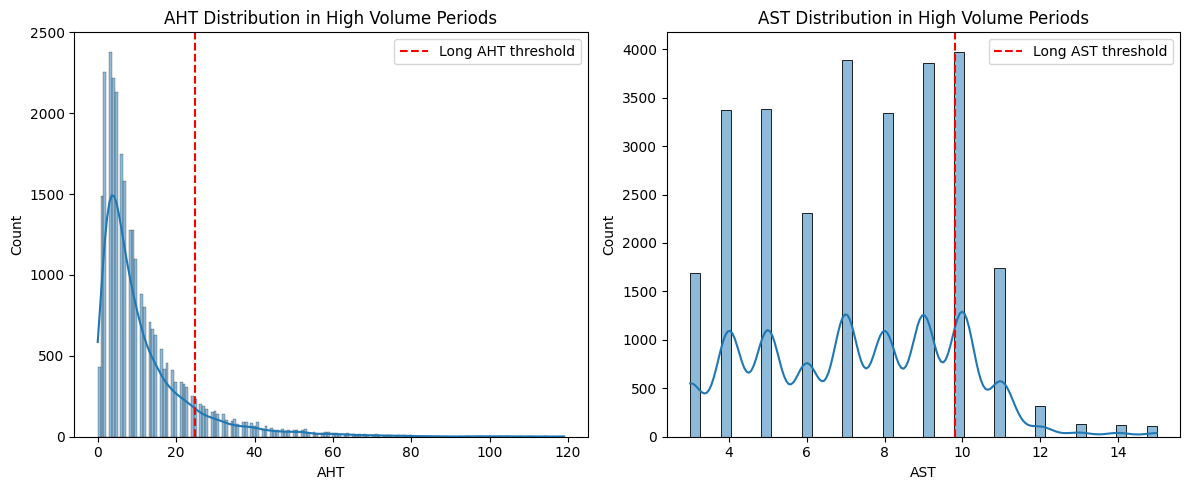

In [ ]:
# AHT and AST distribution in high volume periods
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=high_volume_df, x='AHT', kde=True)
plt.axvline(aht_threshold, color='r', linestyle='--', label='Long AHT threshold')  ## Drawing threshold line for AHT
plt.title('AHT Distribution in High Volume Periods')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(data=high_volume_df, x='AST', kde=True)
plt.axvline(ast_threshold, color='r', linestyle='--', label='Long AST threshold') ## Drawing threshold line for AST
plt.title('AST Distribution in High Volume Periods')
plt.legend()
plt.tight_layout()
plt.show()

MOST AHT is around 10 min. but AST is fairly Distributed

In [ ]:
# factors for long AHT in high volume period

## Gettting long Duration AHT in high volume hours dataframe
long_aht_high_volume = high_volume_df[high_volume_df['is_long_AHT'] == 1]

In [ ]:
# Analyze factors for long AST in high volume periods

## Gettting long Duration AST in high volume hours dataframe
long_ast_high_volume = high_volume_df[high_volume_df['is_long_AST'] == 1]

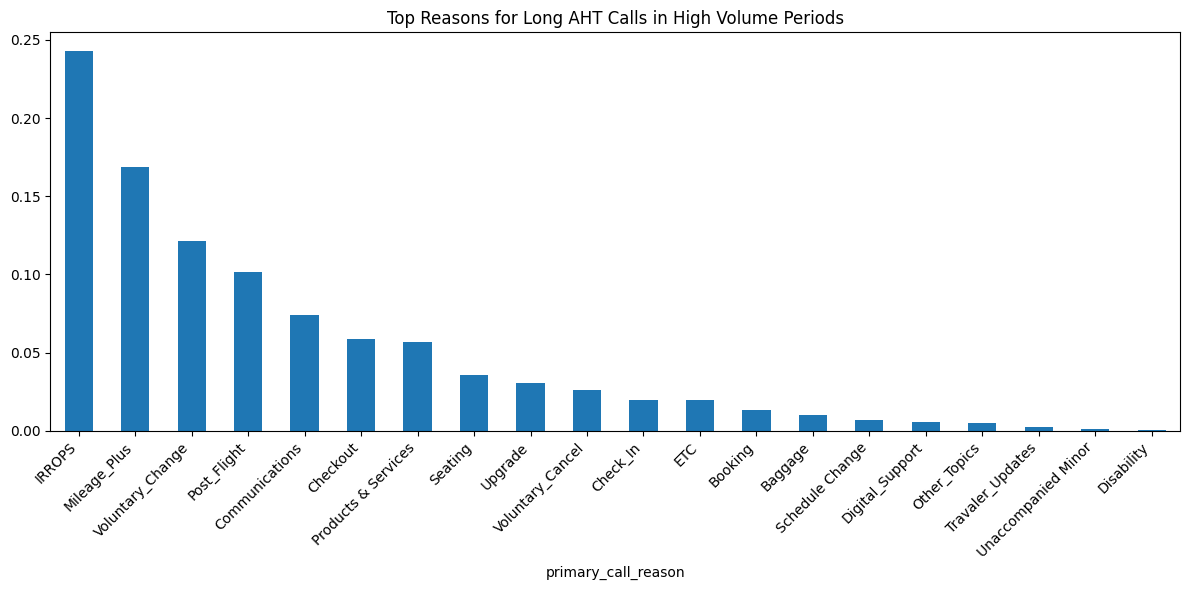

In [ ]:
# Call Reason Analysis
reason_counts = long_aht_high_volume['primary_call_reason'].value_counts(normalize=True)
plt.figure(figsize=(12, 6))
reason_counts.plot(kind='bar')
plt.title('Top Reasons for Long AHT Calls in High Volume Periods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

IRROPS , Mileage_Plus , Voluntary_Change are amoung top PRIMARY_CALL_REASON FOR high long AHT during d=high volume hours

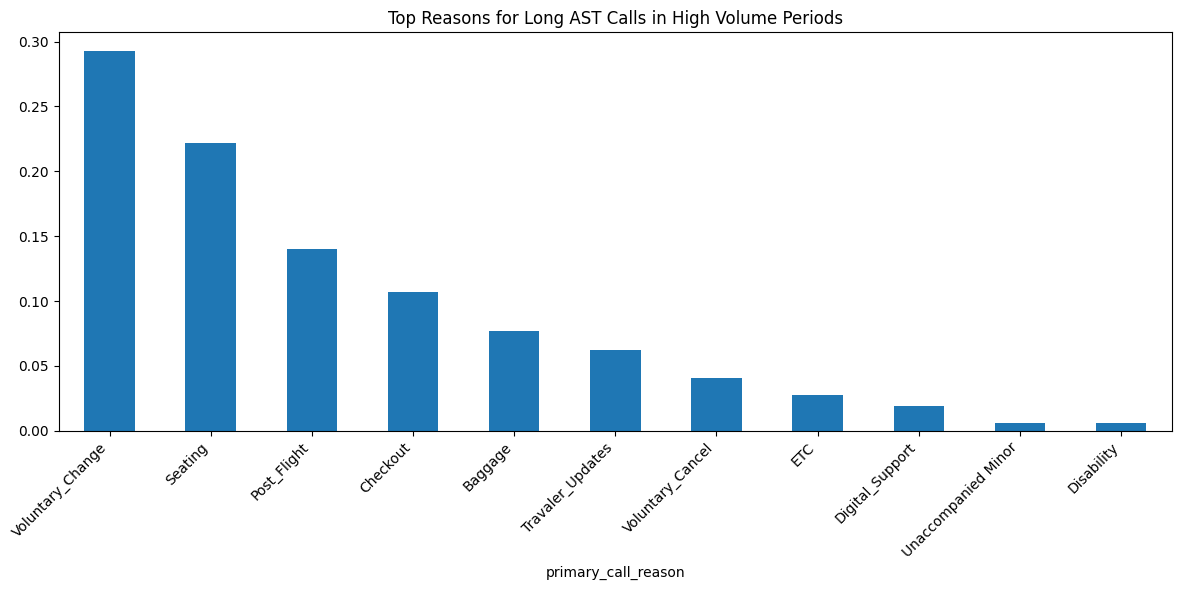

In [ ]:
# Call Reason Analysis
reason_counts = long_ast_high_volume['primary_call_reason'].value_counts(normalize=True)
plt.figure(figsize=(12, 6))
reason_counts.plot(kind='bar')
plt.title('Top Reasons for Long AST Calls in High Volume Periods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

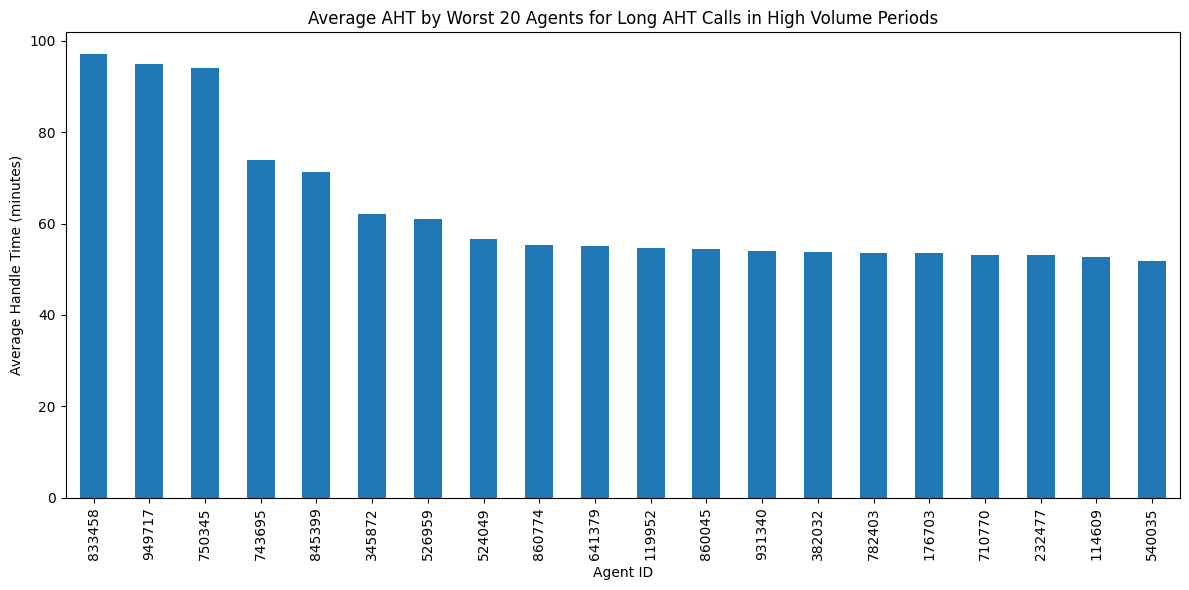

In [ ]:
# Agent Performance

# Assuming 'agent_performance' is already calculated
# Slice the top 20 agents based on AHT
agent_performance = long_aht_high_volume.groupby('agent_id')['AHT'].mean().sort_values(ascending=False) ## asdcending = True
top_20_agents = agent_performance.head(20)

# Plot the data for the top 20 agents
plt.figure(figsize=(12, 6))
top_20_agents.plot(kind='bar')
plt.title('Average AHT by Worst 20 Agents for Long AHT Calls in High Volume Periods')
plt.xlabel('Agent ID')
plt.ylabel('Average Handle Time (minutes)')
plt.tight_layout()

# Display the plot
plt.show()


WORST - Taking Longer times to solve issues

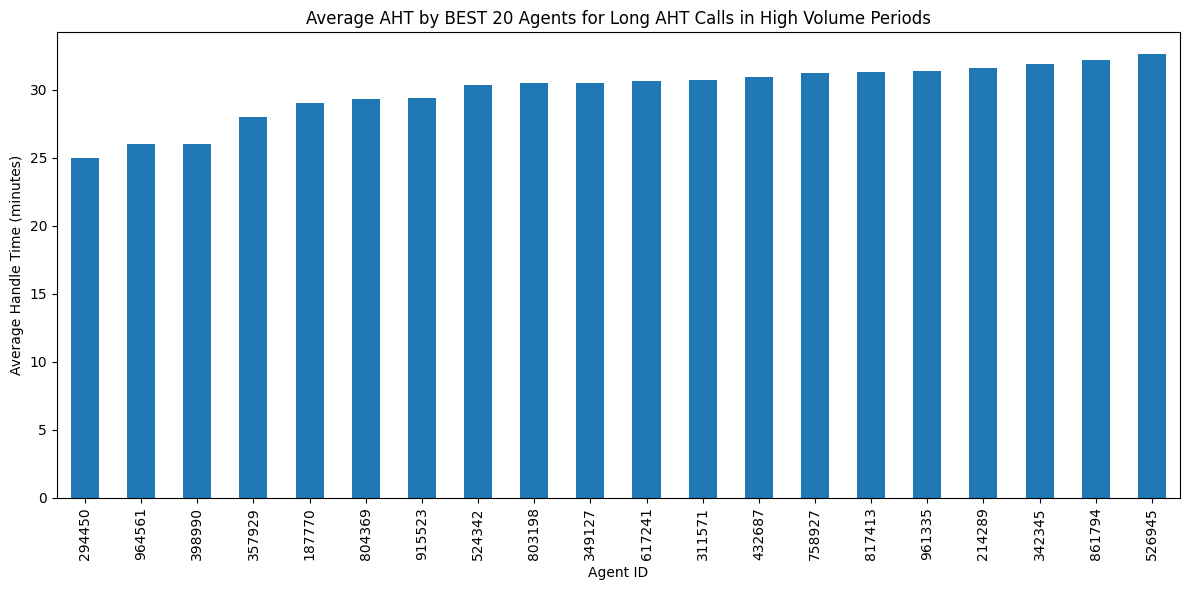

In [ ]:
# Agent Performance

# Assuming 'agent_performance' is already calculated
# Slice the top 20 agents based on AHT
agent_performance = long_aht_high_volume.groupby('agent_id')['AHT'].mean().sort_values(ascending=True)
top_20_agents = agent_performance.head(20)

# Plot the data for the top 20 agents
plt.figure(figsize=(12, 6))
top_20_agents.plot(kind='bar')
plt.title('Average AHT by BEST 20 Agents for Long AHT Calls in High Volume Periods')
plt.xlabel('Agent ID')
plt.ylabel('Average Handle Time (minutes)')
plt.tight_layout()

# Display the plot
plt.show()


BEST - Taking Shorter times to solve issues

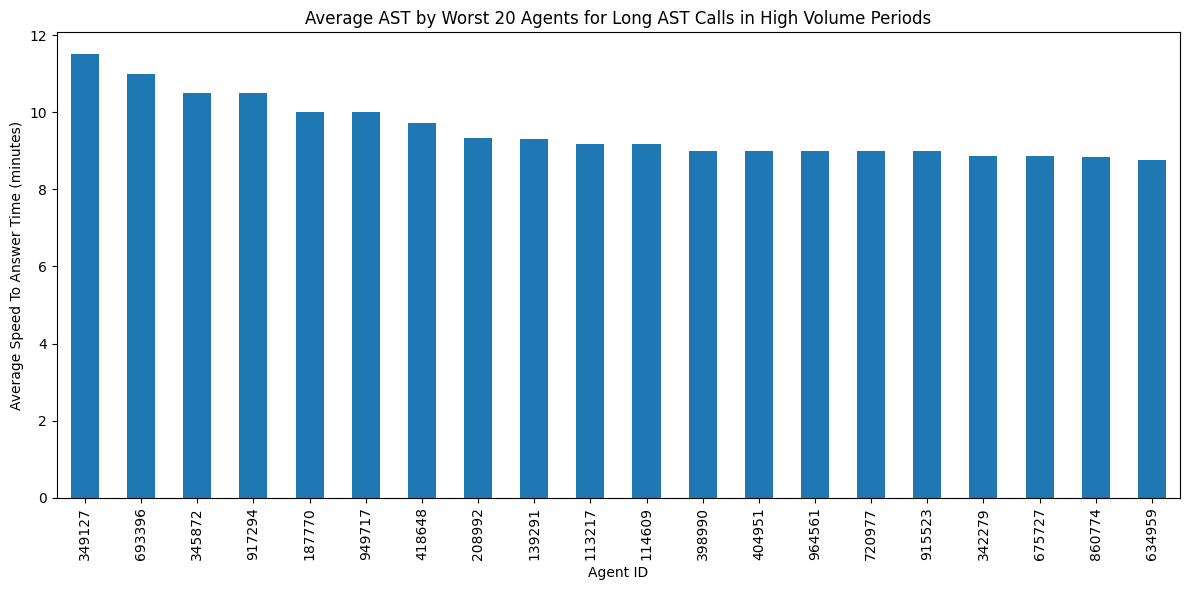

In [ ]:
# Agent Performance
agent_performance = long_aht_high_volume.groupby('agent_id')['AST'].mean().sort_values(ascending=False)
top_20_agents = agent_performance.head(20)

# Plot top 20 agents
plt.figure(figsize=(12, 6))
top_20_agents.plot(kind='bar')
plt.title('Average AST by Worst 20 Agents for Long AST Calls in High Volume Periods')
plt.xlabel('Agent ID')
plt.ylabel('Average Speed To Answer Time (minutes)')
plt.tight_layout()

# Display the plot
plt.show()


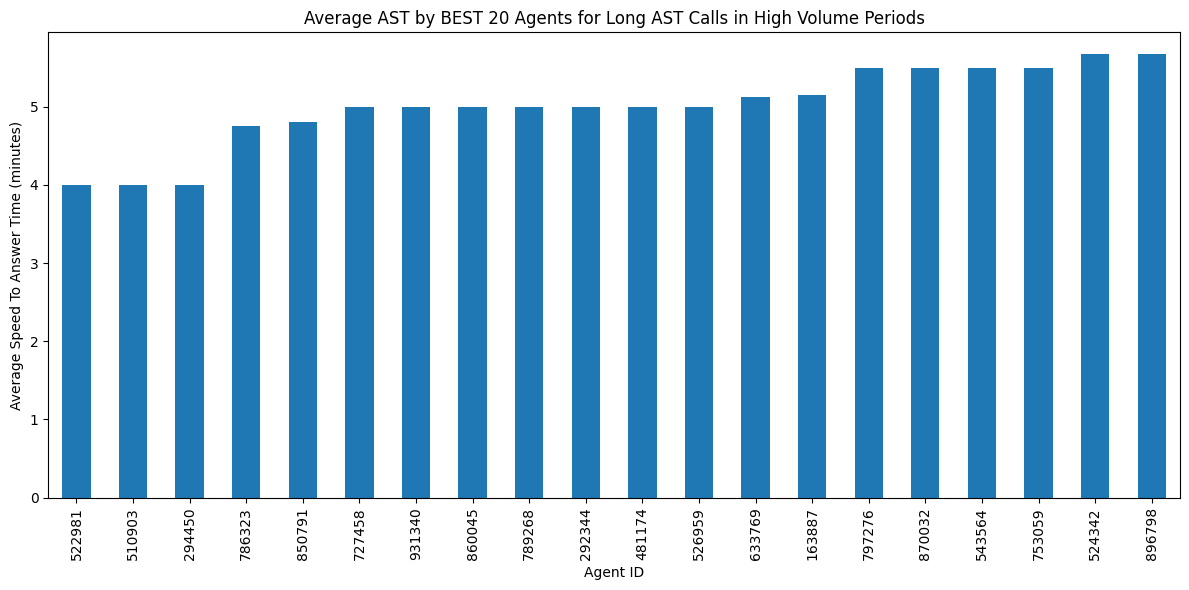

In [ ]:
# Agent Performance

agent_performance = long_aht_high_volume.groupby('agent_id')['AST'].mean().sort_values(ascending=True)
top_20_agents = agent_performance.head(20)

# Plot top 20
plt.figure(figsize=(12, 6))
top_20_agents.plot(kind='bar')
plt.title('Average AST by BEST 20 Agents for Long AST Calls in High Volume Periods')
plt.xlabel('Agent ID')
plt.ylabel('Average Speed To Answer Time (minutes)')
plt.tight_layout()

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


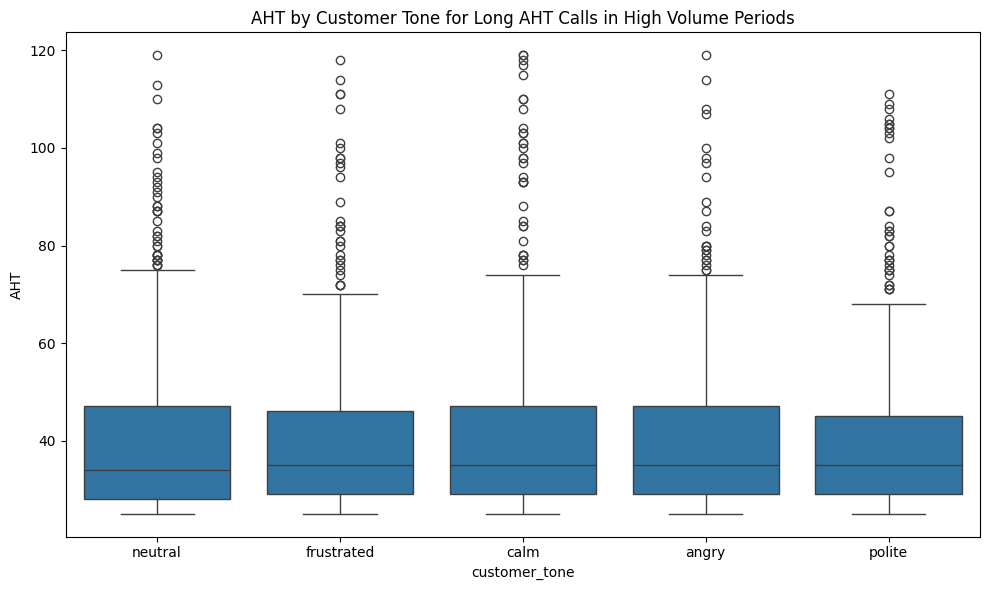

In [ ]:
# Sentiment Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=long_aht_high_volume, x='customer_tone', y='AHT')
plt.title('AHT by Customer Tone for Long AHT Calls in High Volume Periods')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


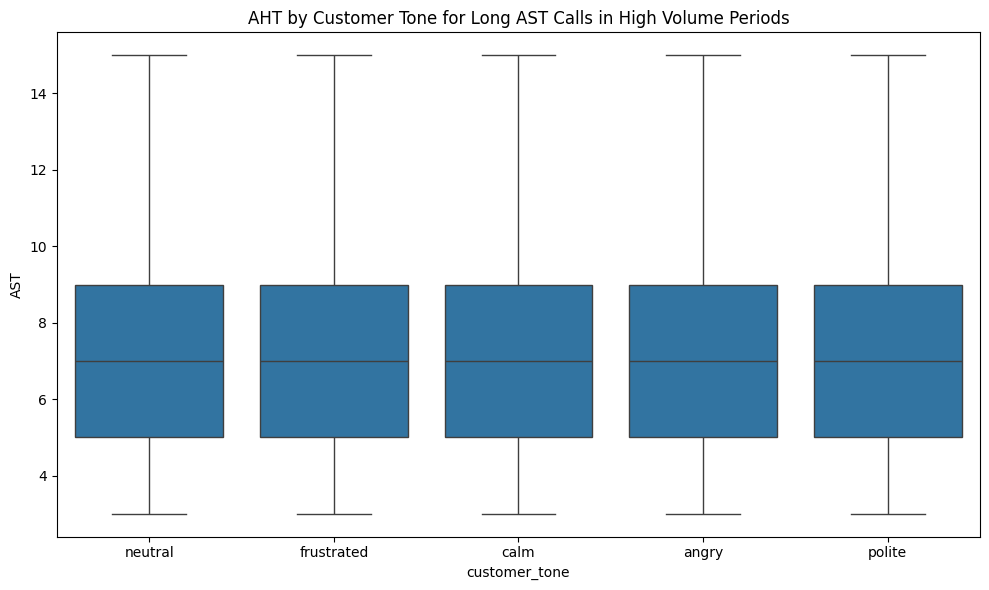

In [ ]:
# Sentiment Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=long_aht_high_volume, x='customer_tone', y='AST')
plt.title('AHT by Customer Tone for Long AST Calls in High Volume Periods')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


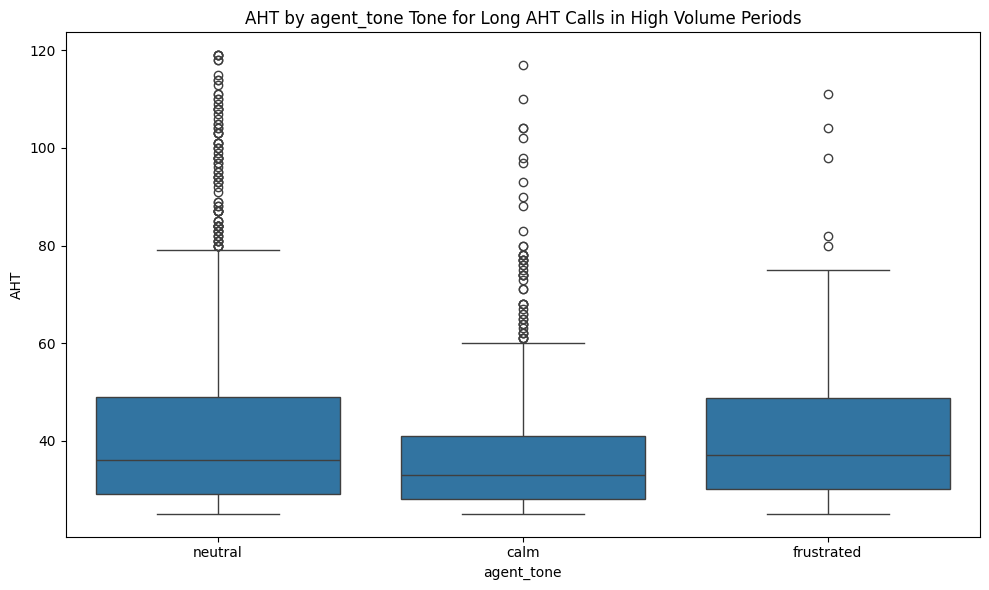

In [ ]:
# Sentiment Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=long_aht_high_volume, x='agent_tone', y='AHT')
plt.title('AHT by agent_tone Tone for Long AHT Calls in High Volume Periods')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


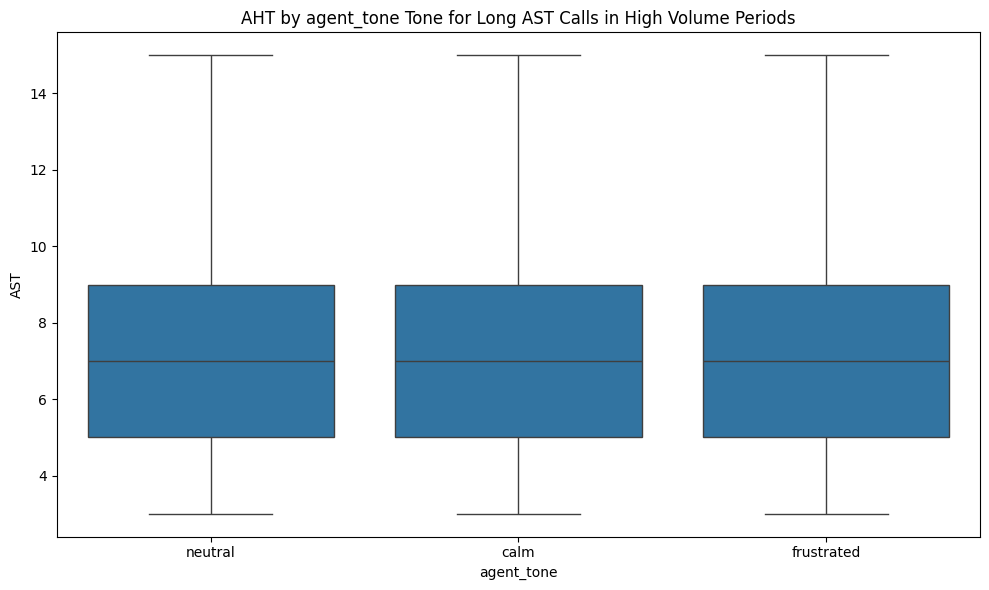

In [ ]:
# Sentiment Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=long_aht_high_volume, x='agent_tone', y='AST')
plt.title('AHT by agent_tone Tone for Long AST Calls in High Volume Periods')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,AHT,AST,call_hour,call_day,is_weekend,is_high_volume,is_long_AHT,is_long_AST
0,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Booking,12.0,3.0,0,3,0,0,0,0
1,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20,Upgrade,7.0,5.0,0,3,0,0,0,0
2,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35,Seating,9.0,10.0,0,3,0,0,0,1
3,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.10,0.11,Mileage_Plus,24.0,5.0,0,3,0,0,0,0
4,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,0.00,0.25,Checkout,13.0,13.0,0,3,0,0,0,1


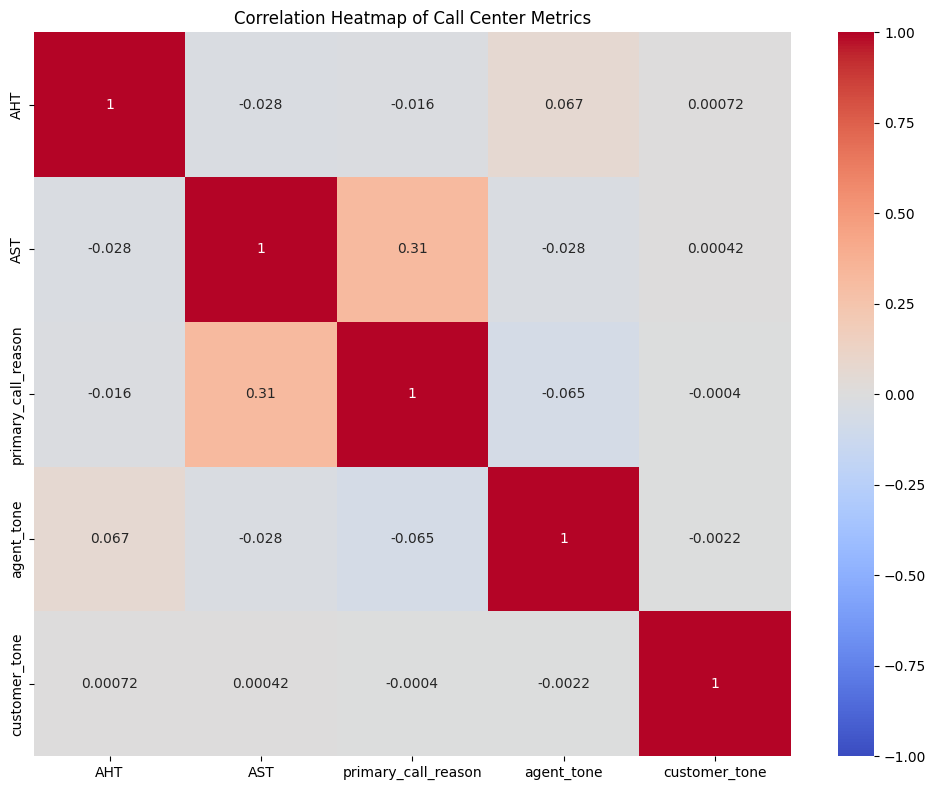

In [ ]:
# Select the relevant columns
columns_of_interest = ['AHT', 'AST', 'primary_call_reason', 'agent_tone', 'customer_tone']

df_corr = df[columns_of_interest].copy()

# categorical  to numeric
df_corr['primary_call_reason'] = pd.Categorical(df_corr['primary_call_reason']).codes
df_corr['agent_tone'] = pd.Categorical(df_corr['agent_tone']).codes
df_corr['customer_tone'] = pd.Categorical(df_corr['customer_tone']).codes

# Calculating the correlation matrix
corr_matrix = df_corr.corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Call Center Metrics')
plt.tight_layout()
plt.show()

Correlation Matrix and heatmap

#  Quantifying the percentage difference between the average handling time for the most frequent and least frequent call reasons.

In [ ]:
 Group by primary_call_reason and calculate mean AHT and count
aht_by_reason = df.groupby('primary_call_reason').agg({
    'AHT': 'mean',
    'primary_call_reason': 'count'
}).rename(columns={'primary_call_reason': 'call_count'}).sort_values('call_count', ascending=False)
most_frequent = aht_by_reason.iloc[0]
least_frequent = aht_by_reason.iloc[-1]

percent_diff = ((most_frequent['AHT'] - least_frequent['AHT']) / least_frequent['AHT']) * 100

In [ ]:
# Grouping by primary_call_reason and calculate mean AHT and count
aht_by_reason = df.groupby('primary_call_reason').agg({
    'AHT': 'mean',
    'primary_call_reason': 'count'
}).rename(columns={'primary_call_reason': 'call_count'}).sort_values('call_count', ascending=False)

In [ ]:
aht_by_reason

,AHT,call_count
primary_call_reason,,
IRROPS,13.337409,12676
Voluntary_Change,10.778030,10560
Seating,8.026667,6150
Mileage_Plus,16.772329,5710
Post_Flight,15.766193,4153
Communications,13.950215,3716
Products & Services,12.641925,3220
Baggage,5.725951,2682
Upgrade,10.680843,2657


In [ ]:
# Identifying  most and least frequent call reasons
most_frequent = aht_by_reason.iloc[0]
least_frequent = aht_by_reason.iloc[-1]

In [ ]:
most_frequent

,IRROPS
AHT,13.337409
call_count,12676.000000


In [ ]:
least_frequent

,Unaccompanied Minor
AHT,8.718447
call_count,103.000000


In [ ]:
# Calculating percentage difference
percent_diff = ((most_frequent['AHT'] - least_frequent['AHT']) / least_frequent['AHT']) * 100

print(f"Most frequent call reason: {most_frequent.name}")
print(f"  Count: {most_frequent['call_count']}")
print(f"  Average AHT: {most_frequent['AHT']:.2f} minutes")

print(f"\nLeast frequent call reason: {least_frequent.name}")
print(f"  Count: {least_frequent['call_count']}")
print(f"  Average AHT: {least_frequent['AHT']:.2f} minutes")

print(f"\nPercentage difference in AHT: {percent_diff:.2f}%")

# Calculating overall average AHT for context
overall_avg_aht = df['AHT'].mean()
print(f"\nOverall average AHT: {overall_avg_aht:.2f} minutes")

# Calculating how the most and least frequent reasons compare to the overall average
most_freq_vs_overall = ((most_frequent['AHT'] - overall_avg_aht) / overall_avg_aht) * 100
least_freq_vs_overall = ((least_frequent['AHT'] - overall_avg_aht) / overall_avg_aht) * 100

print(f"\nMost frequent reason AHT compared to overall average: {most_freq_vs_overall:.2f}%")
print(f"Least frequent reason AHT compared to overall average: {least_freq_vs_overall:.2f}%")

Most frequent call reason: IRROPS
  Count: 12676.0
  Average AHT: 13.34 minutes

Least frequent call reason: Unaccompanied Minor
  Count: 103.0
  Average AHT: 8.72 minutes

Percentage difference in AHT: 52.98%

Overall average AHT: 11.81 minutes

Most frequent reason AHT compared to overall average: 12.97%
Least frequent reason AHT compared to overall average: -26.15%
